<a href="https://colab.research.google.com/github/ihaagrawal/yhills_april/blob/main/TaxiFare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the necessary libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None) #to remove the limit to the number of columns shown  
pd.set_option('display.max_rows', None) #to remove the limit to the number of rows shown

#**DATA EXPLORATION**

##**Reading the dataset**

In [17]:
df = pd.read_csv('/content/TaxiFare (2).csv')

##**Showing a sample of the dataset**

In [18]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
29347,45:00.0,7.70,2011-05-03 07:45:00 UTC,-73.965678,40.768473,-73.971367,40.782448,1
17011,46:12.0,8.90,2009-12-11 18:46:12 UTC,-73.982790,40.774189,-73.988048,40.758336,2
25287,55:00.0,33.83,2014-11-16 22:55:00 UTC,-73.863005,40.769247,-73.963925,40.770945,1
47594,10:00.0,13.30,2009-01-01 20:10:00 UTC,-73.985223,40.763067,-73.985390,40.723393,5
18335,29:00.0,8.10,2012-07-31 13:29:00 UTC,-73.968545,40.761490,-73.958087,40.781922,1
2571,39:00.0,5.00,2014-02-13 19:39:00 UTC,-73.982957,40.771805,-73.980398,40.764920,5
46087,49:12.0,5.00,2013-06-18 07:49:12 UTC,0.000000,0.000000,0.000000,0.000000,2
23926,02:40.0,6.00,2012-10-24 18:02:40 UTC,-73.978538,40.777435,-73.987323,40.765467,1
23266,30:00.0,11.70,2010-11-19 16:30:00 UTC,-73.977105,40.747075,-73.987308,40.768865,1
8190,56:39.0,5.00,2015-03-18 08:56:39 UTC,-73.981598,40.747078,-73.988083,40.737881,1


##**Showing the shape (rows, columns) of the dataset**

In [19]:
df.shape

(50000, 8)

##**Seperating date, time and hour from pickup time**

In [20]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

df['year'] = df.date_time_of_pickup.apply(lambda t: t.year)
df['weekday'] = df.date_time_of_pickup.apply(lambda t: t.weekday())
df['hour'] = df.date_time_of_pickup.apply(lambda t: t.hour)

In [26]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour
30814,20:00.0,4.5,2014-10-19 08:20:00,-73.986210,40.730625,-73.997017,40.725657,1,2014,6,8
35166,37:49.0,4.0,2015-03-02 17:37:49,-73.953209,40.772812,-73.948593,40.774162,6,2015,0,17
33828,48:00.0,6.1,2012-06-22 01:48:00,-74.015827,40.711037,-74.008315,40.704557,1,2012,4,1
44441,51:48.0,11.0,2013-10-25 16:51:48,-73.972993,40.748640,-73.984902,40.712433,1,2013,4,16
41552,50:00.0,8.5,2014-05-30 10:50:00,-73.954545,40.767277,-73.968707,40.764562,2,2014,4,10
49002,29:00.0,4.5,2010-06-25 12:29:00,-73.963718,40.774750,-73.955138,40.782937,3,2010,4,12
17161,03:00.0,12.5,2009-11-27 16:03:00,-73.984987,40.757140,-73.947675,40.783423,2,2009,4,16
5343,38:57.0,14.5,2015-03-03 15:38:57,-73.985535,40.752983,-73.985397,40.770584,1,2015,1,15
21684,12:55.0,9.7,2009-04-15 12:12:55,-73.982046,40.772823,-73.958585,40.783347,1,2009,2,12
44405,11:00.0,14.5,2009-09-13 18:11:00,-73.994238,40.702863,-73.964598,40.717477,5,2009,6,18


##**Looking at the datatypes**

In [21]:
df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
year                             int64
weekday                          int64
hour                             int64
dtype: object

##**Looking at the missing values**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   unique_id             50000 non-null  object        
 1   amount                50000 non-null  float64       
 2   date_time_of_pickup   50000 non-null  datetime64[ns]
 3   longitude_of_pickup   50000 non-null  float64       
 4   latitude_of_pickup    50000 non-null  float64       
 5   longitude_of_dropoff  50000 non-null  float64       
 6   latitude_of_dropoff   50000 non-null  float64       
 7   no_of_passenger       50000 non-null  int64         
 8   year                  50000 non-null  int64         
 9   weekday               50000 non-null  int64         
 10  hour                  50000 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 4.2+ MB


In [23]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
weekday                 0
hour                    0
dtype: int64

##**There seem to be no missing values in the dataset**

#**DATA CLEANING**

###**Removing fair prices less than zero**

In [24]:
df = df[df.amount>0]

In [25]:
df.shape

(49991, 11)

##**9 rows were dropped due to fair amount<0**

##**Removing unique id and date_time_of_pickup since we already got the date and time from date_time_of_pickup column**


In [28]:
df = df.drop(['unique_id', 'date_time_of_pickup'], axis=1)

In [29]:
df.shape

(49991, 9)

#**DATA VISULALISATION**

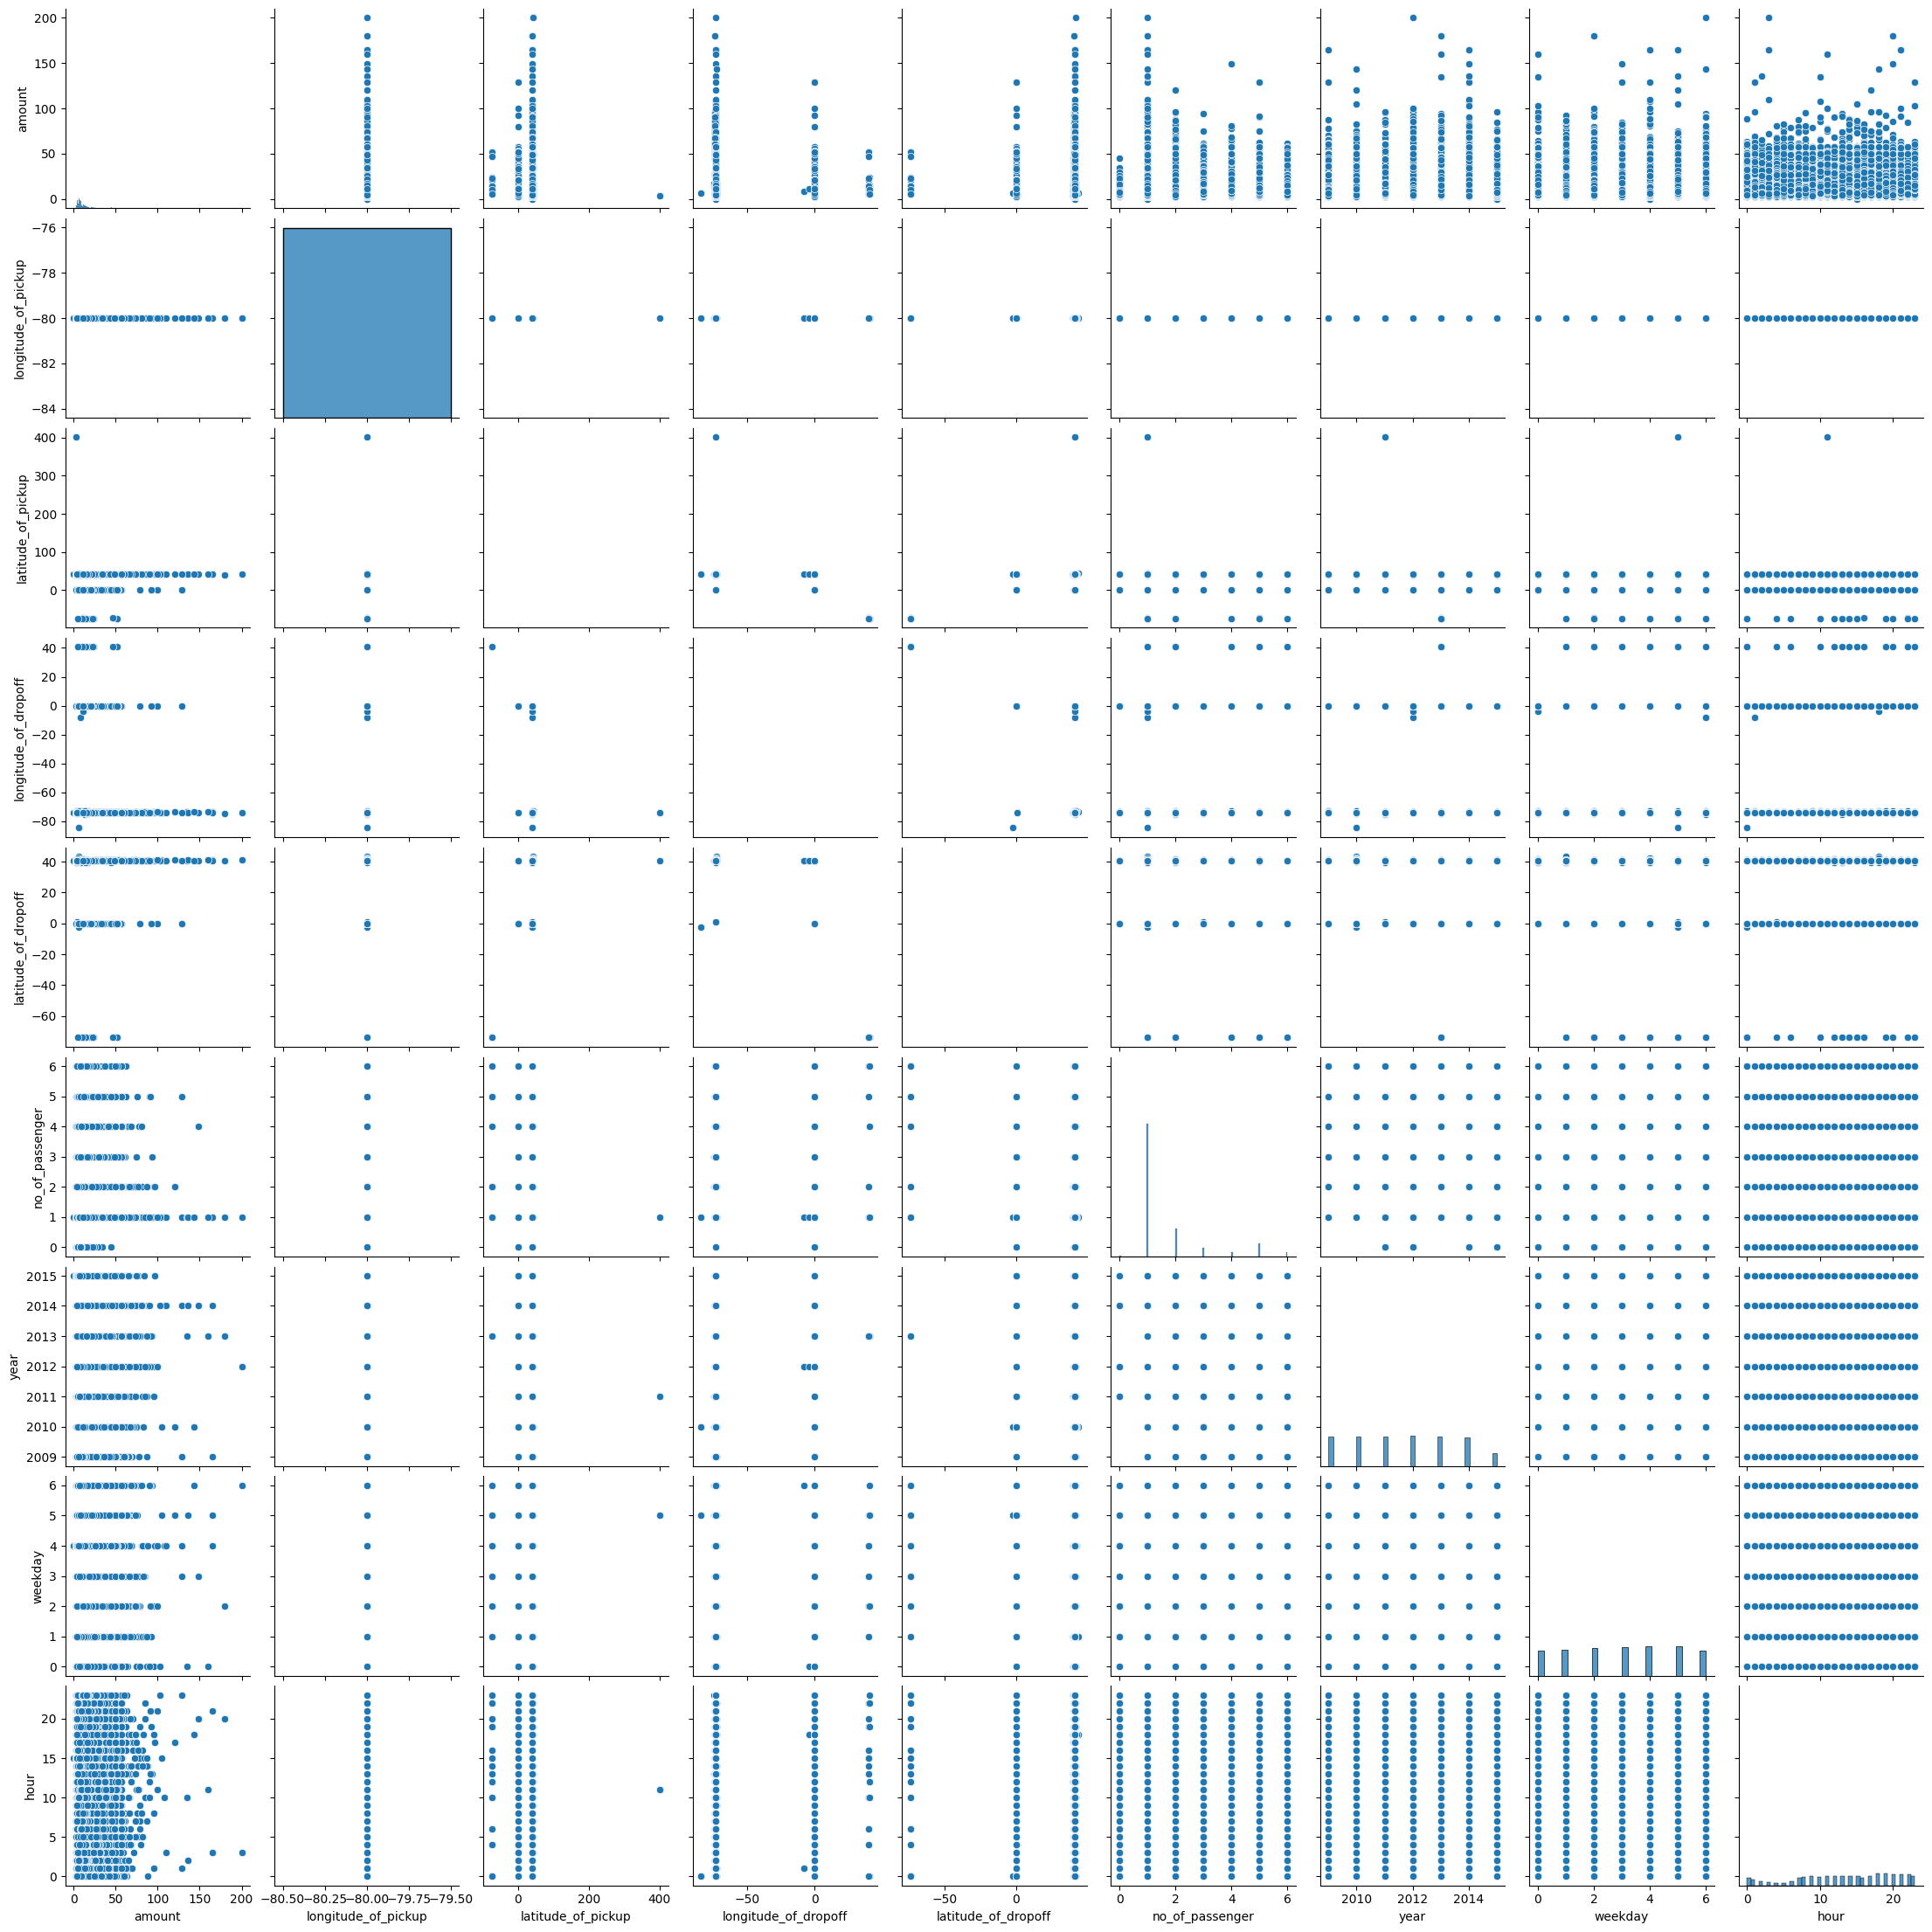

In [44]:
#sns.pairplot(df)

#**DATA SPLITTING**

##**Splitting the data in train and test**

In [45]:
Y=df["amount"]
X=df.drop(["amount"], axis=1)

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

##**Fitting the linear model**

In [47]:
model1=LinearRegression()

In [48]:
model1.fit(X_train,Y_train)

LinearRegression()

In [49]:
model1.score(X_train,Y_train)

0.015508772387601066

In [50]:
model1.score(X_test,Y_test)

0.014788827196375642

#**Decision Tree**

In [121]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model2.fit(X_train,Y_train)
model2.score(X_train,Y_train)

0.47765049496053547

In [122]:
model2.score(X_test,Y_test)

0.46004875003181467

#**Bagging Regressor**

In [131]:
from sklearn.ensemble import BaggingRegressor
model3=BaggingRegressor(n_estimators=200)
model3.fit(X_train,Y_train)
model3.score(X_train,Y_train)

0.9508882693735107

In [132]:
model3.score(X_test,Y_test)

0.6799901494062343

#**AdaBoost Regressor**

In [133]:
from sklearn.ensemble import AdaBoostRegressor
model4=AdaBoostRegressor(n_estimators=100)
model4.fit(X_train,Y_train)
model4.score(X_train,Y_train)

-1.7748683251635393

In [134]:
model4.score(X_test,Y_test)

-2.105975834369729

#**Gradient Boosting**

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
model5=GradientBoostingRegressor(n_estimators=85)
model5.fit(X_train,Y_train)
model5.score(X_train,Y_train)

0.6792808023898217

In [106]:
model5.score(X_test,Y_test)

0.6378732812128071

#**Random Forest Regressor**

In [141]:
from sklearn.ensemble import RandomForestRegressor
model6=RandomForestRegressor(n_estimators=100,max_features=5)
model6.fit(X_train,Y_train)
model6.score(X_train,Y_train)

0.9520675203744392

In [142]:
model6.score(X_test,Y_test)

0.6900878321186261